Topics covered and steps:
1. pandas - used to organize and format complex data in table structures called DataFrames

   pandas_datareader: used to access public financial data from the Internet and import it into Python as a DataFrame.
   using tiingo

2. MinMaxScaler
3. Splitting train and test data
4. Data Preprocessing:
      i. X_train, y_train, X_test, y_test
      ii. timesteps
5. Reshape input to be [samples, time steps, features] which is required as input for LSTM
6. Creating stacked LSTM Model
   
      i. Model used: Sequential (In Keras, the Sequential model is a linear stack of layers.)

      ii. 3 LSTM layers

         ii.a. 1st layer: The 50 indicates that the LSTM layer will have 50 units (or neurons). return_sequences=True means that this LSTM layer will output the full sequence of hidden states rather than just the last one. input_shape=(100, 1) specifies the shape of the input data expected by this layer.

         ii.b. 2nd layer: It has the same configuration as the previous LSTM layer, with 50 units and return_sequences=True, meaning it also returns sequences.

         ii.c. 3rd layer: It has 50 units, but return_sequences is not specified, so its default value is False, meaning it will only return the last output in the sequence.

      iii. 1 ouput layer: Dense

      iv. Compiled using: loss='mean_squared_error', optimizer='adam' 

      (The loss function is set to 'mean_squared_error', which is commonly used for regression problems. The optimizer is set to 'adam', which is an optimization algorithm used to update network weights iteratively based on training data)

      v. Model summary 
   
   (A summary of the model, including the type of each layer, the output shape of each layer, and the number of parameters (weights) in each layer.) 
7. Training the Model

   The LSTM model will be trained using the specified training data (X_train and y_train). The model's performance will be evaluated on the validation data (X_test and y_test) after each epoch, and you'll see the training progress displayed according to the verbosity mode specified. After training completes, the trained model will be ready for evaluation or further use.

   (model.fit(

    X_train,         # Training data

    y_train,         # Target (label) data

    validation_data=(X_test, y_test),  # Data used for validation during training

    epochs=100,      # Number of training epochs (iterations over the entire dataset)

    batch_size=64,   # Number of samples per gradient update

    verbose=1        # Verbosity mode: 0 = silent, 1 = progress bar, 2 = one line per epoch
    
   ))
8. Do the prediction and check performance metrics
9. Transformback to original form

   An inverse scaling transformation is applied to the LSTM model's predictions, reverting them to their original scale after training, which is crucial for interpretability and comparison with the original data. Scaling (where we adjust the range of the input features to be within a specific range, such as [0, 1] or [-1, 1]) during preprocessing helps the model converge faster and prevents feature dominance.
10. Calculate RMSE (Root Mean Square) performance metrics
11. Test Data RMSE

      These lines compute the root mean squared error (RMSE) between the actual and predicted values for both training and test datasets, assessing the model's performance.By taking the square root of the mean squared error, it provides a measure of the average magnitude of these differences, with lower values indicating better model performance.

12. Plotting: 

      i. shift train predictions for plotting

      ii. shift test predictions for plotting

      iii.plot baseline and predictions

13. Demonstrate prediction for next 10 days

In [111]:
import pandas_datareader as pdr

In [112]:
import requests

headers = {
        'Content-Type': 'application/json'
        }
requestResponse = requests.get("https://api.tiingo.com/api/test?token=57bc2051cf364a9b42c865b2cf1840533bfe4c2d",
                                    headers=headers)
print(requestResponse.json())

{'message': 'You successfully sent a request'}


In [113]:
key = '57bc2051cf364a9b42c865b2cf1840533bfe4c2d'

In [114]:
df = pdr.get_data_tiingo('AAPL', api_key = key)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16700\3485825488.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key = key)


In [115]:
df.to_csv('AAPL.csv')

In [116]:
import pandas as pd

In [117]:
df = pd.read_csv('AAPL.csv')

In [118]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-02-19 00:00:00+00:00,170.93,171.44,169.49,169.71,18972826,41.137246,41.259986,40.790685,40.843632,75891304,0.0,1.0
1,AAPL,2019-02-20 00:00:00+00:00,172.03,173.32,170.99,171.19,26114362,41.401980,41.712440,41.151686,41.199819,104457448,0.0,1.0
2,AAPL,2019-02-21 00:00:00+00:00,171.06,172.37,170.30,171.80,17249670,41.168532,41.483806,40.985625,41.346626,68998680,0.0,1.0
3,AAPL,2019-02-22 00:00:00+00:00,172.97,173.00,171.38,171.58,18913154,41.628207,41.635427,41.245546,41.293679,75652616,0.0,1.0
4,AAPL,2019-02-25 00:00:00+00:00,174.23,175.87,173.95,174.16,21873358,41.931447,42.326142,41.864061,41.914601,87493432,0.0,1.0


In [119]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2024-02-12 00:00:00+00:00,187.15,188.67,186.7900,188.415,41781934,187.15,188.67,186.7900,188.415,41781934,0.0,1.0
1255,AAPL,2024-02-13 00:00:00+00:00,185.04,186.21,183.5128,185.770,56529529,185.04,186.21,183.5128,185.770,56529529,0.0,1.0
1256,AAPL,2024-02-14 00:00:00+00:00,184.15,185.53,182.4400,185.320,54630517,184.15,185.53,182.4400,185.320,54630517,0.0,1.0
1257,AAPL,2024-02-15 00:00:00+00:00,183.86,184.49,181.3500,183.550,65434496,183.86,184.49,181.3500,183.550,65434496,0.0,1.0
1258,AAPL,2024-02-16 00:00:00+00:00,182.31,184.85,181.6650,183.420,49752465,182.31,184.85,181.6650,183.420,49752465,0.0,1.0


In [120]:
df1 = df.reset_index()['close']

In [121]:
df1.shape

(1259,)

In [122]:
df1

0       170.93
1       172.03
2       171.06
3       172.97
4       174.23
         ...  
1254    187.15
1255    185.04
1256    184.15
1257    183.86
1258    182.31
Name: close, Length: 1259, dtype: float64

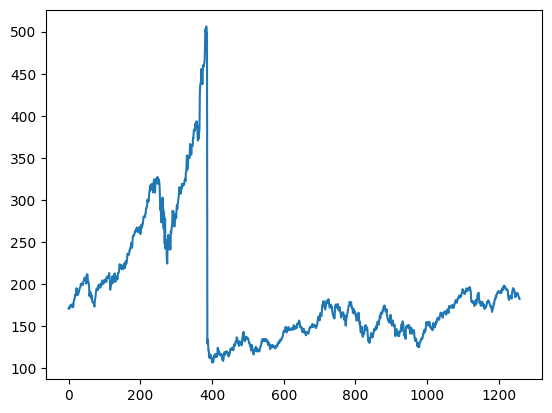

In [123]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [124]:
import numpy as np

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [126]:
df1.shape

(1259, 1)

In [127]:
print(df1)

[[0.16052599]
 [0.16328115]
 [0.1608516 ]
 ...
 [0.19363807]
 [0.19291171]
 [0.18902943]]


Splitting Data

In [128]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [129]:
print(train_data) 

[[1.60525986e-01]
 [1.63281152e-01]
 [1.60851597e-01]
 [1.65635567e-01]
 [1.68791484e-01]
 [1.69041954e-01]
 [1.70394490e-01]
 [1.66086412e-01]
 [1.70644959e-01]
 [1.72849092e-01]
 [1.72047589e-01]
 [1.69517846e-01]
 [1.64458359e-01]
 [1.65485285e-01]
 [1.80488416e-01]
 [1.85522855e-01]
 [1.87526612e-01]
 [1.92586099e-01]
 [1.98572323e-01]
 [2.03331246e-01]
 [1.99599249e-01]
 [2.03681904e-01]
 [2.21039449e-01]
 [2.10920476e-01]
 [2.05134627e-01]
 [2.00250470e-01]
 [2.04458359e-01]
 [2.05084534e-01]
 [2.08165310e-01]
 [2.11396368e-01]
 [2.18359424e-01]
 [2.21690670e-01]
 [2.22542267e-01]
 [2.25823419e-01]
 [2.33587977e-01]
 [2.32085160e-01]
 [2.34890420e-01]
 [2.30707577e-01]
 [2.30507201e-01]
 [2.31408892e-01]
 [2.31458986e-01]
 [2.41177207e-01]
 [2.43005636e-01]
 [2.44683782e-01]
 [2.52072636e-01]
 [2.51271133e-01]
 [2.46562304e-01]
 [2.44107702e-01]
 [2.44884158e-01]
 [2.35015654e-01]
 [2.59686913e-01]
 [2.56255479e-01]
 [2.62767689e-01]
 [2.54577332e-01]
 [2.40500939e-01]
 [2.406011

In [130]:
print(test_data)

[[0.10619912]
 [0.08510958]
 [0.07641828]
 [0.07701941]
 [0.09084534]
 [0.08395742]
 [0.08435817]
 [0.09252348]
 [0.107201  ]
 [0.10519724]
 [0.10487163]
 [0.11113338]
 [0.096531  ]
 [0.09843456]
 [0.10487163]
 [0.10299311]
 [0.08966813]
 [0.07586725]
 [0.0627176 ]
 [0.06492173]
 [0.07160927]
 [0.05815905]
 [0.06191609]
 [0.07271133]
 [0.07140889]
 [0.0787226 ]
 [0.08721353]
 [0.08721353]
 [0.07664371]
 [0.08112711]
 [0.07484033]
 [0.0803757 ]
 [0.08696306]
 [0.09036944]
 [0.09896055]
 [0.10068879]
 [0.0952536 ]
 [0.09773325]
 [0.09680651]
 [0.10427051]
 [0.10852849]
 [0.10076393]
 [0.11060739]
 [0.11571697]
 [0.12150282]
 [0.1183469 ]
 [0.11549155]
 [0.11211021]
 [0.12510958]
 [0.12651221]
 [0.13943644]
 [0.13693175]
 [0.1331747 ]
 [0.14850344]
 [0.14770194]
 [0.14654978]
 [0.14534753]
 [0.14547276]
 [0.15629305]
 [0.15441453]
 [0.16345648]
 [0.1661866 ]
 [0.16578585]
 [0.16959299]
 [0.16859111]
 [0.16200376]
 [0.15211021]
 [0.15125861]
 [0.15201002]
 [0.15827176]
 [0.14221666]
 [0.13

Data Preprocessing

In [131]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [132]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [133]:
print(X_train)

[[0.16052599 0.16328115 0.1608516  ... 0.23644333 0.24142768 0.23772073]
 [0.16328115 0.1608516  0.16563557 ... 0.24142768 0.23772073 0.24160301]
 [0.1608516  0.16563557 0.16879148 ... 0.23772073 0.24160301 0.24638698]
 ...
 [0.16385723 0.16105197 0.15757044 ... 0.12633688 0.11326237 0.11939887]
 [0.16105197 0.15757044 0.16568566 ... 0.11326237 0.11939887 0.09933626]
 [0.15757044 0.16568566 0.17232311 ... 0.11939887 0.09933626 0.08946775]]


In [134]:
print(y_train)

[2.41603006e-01 2.46386976e-01 2.44608641e-01 2.41728240e-01
 2.47514089e-01 2.39824671e-01 2.51421415e-01 2.55479023e-01
 2.55053225e-01 2.50920476e-01 2.52723857e-01 2.57582968e-01
 2.55328741e-01 2.65998748e-01 2.54452098e-01 2.43406387e-01
 2.16656230e-01 2.25823419e-01 2.30932999e-01 2.41928616e-01
 2.35817157e-01 2.34539762e-01 2.55804634e-01 2.40225423e-01
 2.37695679e-01 2.49618034e-01 2.59261115e-01 2.59286162e-01
 2.64996869e-01 2.64546024e-01 2.39949906e-01 2.49592987e-01
 2.43757044e-01 2.47188478e-01 2.55904822e-01 2.55228554e-01
 2.47614277e-01 2.56355667e-01 2.66599875e-01 2.66549781e-01
 2.68829054e-01 2.75165936e-01 2.92423294e-01 2.91170946e-01
 2.80300564e-01 2.83180964e-01 2.85184721e-01 2.90369443e-01
 2.85835942e-01 2.77745773e-01 2.80225423e-01 2.77620539e-01
 2.86011271e-01 2.83155917e-01 2.80475892e-01 2.93375078e-01
 2.94927990e-01 2.80826550e-01 2.85485285e-01 3.00989355e-01
 3.01114590e-01 2.94452098e-01 3.01039449e-01 3.08703820e-01
 3.24032561e-01 3.231809

In [135]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [136]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [137]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [139]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [140]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [141]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 35s 818ms/step - loss: 0.0368 - val_loss: 7.7030e-04
Epoch 2/100
12/12 [==============================] - 4s 354ms/step - loss: 0.0146 - val_loss: 0.0021
Epoch 3/100
12/12 [==============================] - 4s 332ms/step - loss: 0.0112 - val_loss: 4.0193e-04
Epoch 4/100
12/12 [==============================] - 4s 350ms/step - loss: 0.0094 - val_loss: 0.0011
Epoch 5/100
12/12 [==============================] - 5s 397ms/step - loss: 0.0083 - val_loss: 2.4838e-04
Epoch 6/100
12/12 [==============================] - 4s 314ms/step - loss: 0.0077 - val_loss: 2.1916e-04
Epoch 7/100
12/12 [==============================] - 4s 318ms/step - loss: 0.0066 - val_loss: 2.4140e-04
Epoch 8/100
12/12 [==============================] - 5s 422ms/step - loss: 0.0058 - val_loss: 5.9626e-04
Epoch 9/100
12/12 [==============================] - 8s 729ms/step - loss: 0.0057 - val_loss: 0.0020
Epoch 10/100
12/12 [==============================] - 7s 573ms/ste

In [142]:
import tensorflow as tf

In [143]:
tf.__version__

'2.13.0'

In [144]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 93ms/step


In [145]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [146]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

222.09188011874986

In [147]:
math.sqrt(mean_squared_error(y_test,test_predict))

172.98452481810764

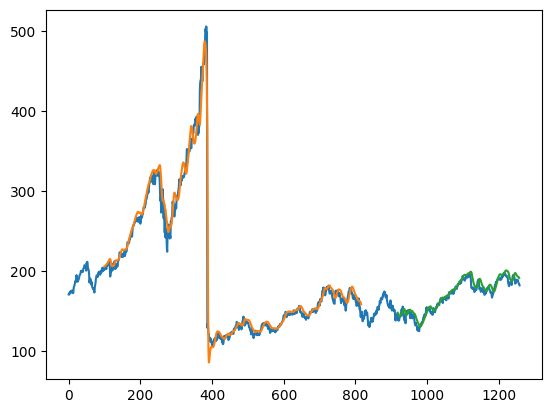

In [148]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [149]:
len(test_data)

441

In [150]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [151]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [152]:
temp_input

[0.16310582341891044,
 0.15927363807138384,
 0.15992485911083276,
 0.16122730118973072,
 0.16758922980588598,
 0.16420788979336254,
 0.1673638071383844,
 0.17049467752035058,
 0.17695679398872882,
 0.18071383844708827,
 0.17921102066374445,
 0.18274264245460237,
 0.1850219160926737,
 0.18036318096430803,
 0.18003757044458357,
 0.17610519724483403,
 0.17282404508453347,
 0.17187226048841575,
 0.1654101440200375,
 0.1657107075767063,
 0.1668127739511584,
 0.16095178459611764,
 0.15040701314965554,
 0.1537382592360676,
 0.15892298058860355,
 0.16012523481527863,
 0.16814026299311202,
 0.17715716969317463,
 0.17485284909204757,
 0.1813149655604257,
 0.18780212899185966,
 0.19048215403882274,
 0.1892798998121477,
 0.19927363807138382,
 0.19526612398246712,
 0.20187852222917968,
 0.20330619912335623,
 0.2075641828428303,
 0.2075140889167188,
 0.21192235441452717,
 0.20989355040701307,
 0.211571696931747,
 0.20821540388227922,
 0.2077645585472761,
 0.2092924232936756,
 0.20671258609893545,
 0

In [153]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.20729779]
101
1 day input [0.15927364 0.15992486 0.1612273  0.16758923 0.16420789 0.16736381
 0.17049468 0.17695679 0.18071384 0.17921102 0.18274264 0.18502192
 0.18036318 0.18003757 0.1761052  0.17282405 0.17187226 0.16541014
 0.16571071 0.16681277 0.16095178 0.15040701 0.15373826 0.15892298
 0.16012523 0.16814026 0.17715717 0.17485285 0.18131497 0.18780213
 0.19048215 0.1892799  0.19927364 0.19526612 0.20187852 0.2033062
 0.20756418 0.20751409 0.21192235 0.20989355 0.2115717  0.2082154
 0.20776456 0.20929242 0.20671259 0.20816531 0.21139637 0.20686287
 0.21685661 0.21410144 0.2189856  0.22259236 0.21625548 0.22008766
 0.22822793 0.22860363 0.2272511  0.22304321 0.22567314 0.22038823
 0.22001252 0.21730745 0.21592987 0.21618034 0.21725736 0.21462743
 0.19737007 0.19388854 0.18802755 0.18619912 0.19716969 0.19611772
 0.19874765 0.19724483 0.19807138 0.19233563 0.18995617 0.20485911
 0.21219787 0.21803381 0.22126487 0.21956168 0.21873513 0.21435191
 0.21262367 0.20338134 0.19426425 0

In [154]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [155]:
import matplotlib.pyplot as plt

In [156]:
len(df1)

1259

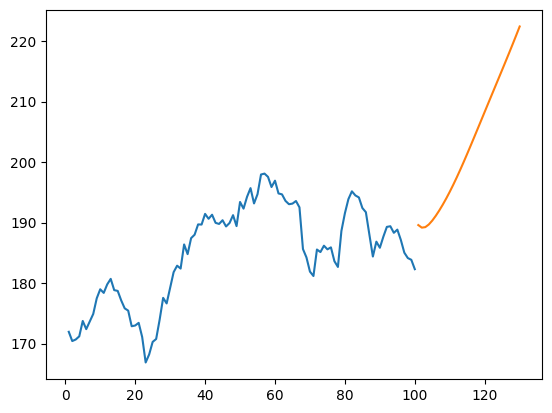

In [157]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

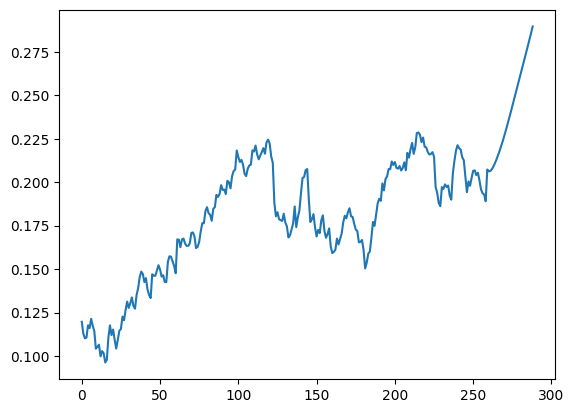

In [161]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [162]:
df3=scaler.inverse_transform(df3).tolist()

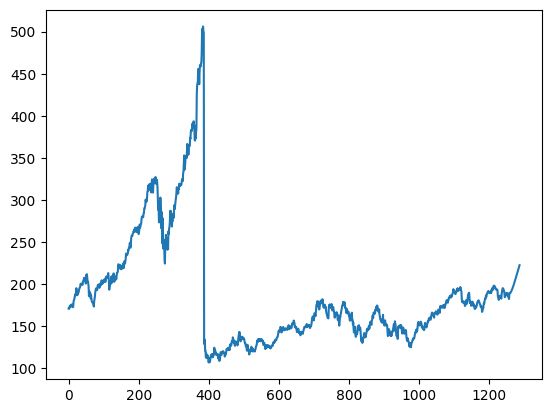

In [163]:
plt.plot(df3)